# $\nu$-SQuIDS Demo: Welcome!

In [1]:
%matplotlib inline
import matplotlib as mpl
import nuSQUIDSpy as nsq

import nuSQUIDSTools
import numpy as np
mpl.rc('font', family='serif', size=20)

Welcome to the $\nu$-SQuIDS demo. In 
this notebook we will demostrate some of the functionalities of the $\nu$-SQuIDS' python bindings. All of the calculations performed here can also be done in the C++ interface. Enjoy :)! Carlos, Jordi & Chris.

#The Basics: single energy mode#

#### Basic definitions

To start, like in the C++ case, we need to create a $\nu$-SQuIDS object. To begin this demonstration we will create a simple single energy three flavor neutrino oscillation calculator. Thus we just need to specify the number of neutrinos (3) and if we are dealing with neutrinos or antineutrinos.

In [2]:
nuSQ = nsq.nuSQUIDS(3,nsq.NeutrinoType.neutrino)

As in the C++ $\nu$-SQuIDS interface one can propagate the neutrinos in various environments (see the documentation for further details), and the user can create and include their own environments. To start a simple case, lets consider oscillactions in <strong> Vacuum </strong>

In [3]:
nuSQ.Set_Body(nsq.Vacuum())

Since we have specify that we are considering vacuum propagation, we must construct - as in the C++ interface - a *trayectory* inside that object. This can be done using the `Track` property of the given `Body`. Each `Body` will have its on `Track` subclass and its constructors. We can set and construct a <strong>vacuum trayectory</strong> in the following way:

In [4]:
nuSQ.Set_Track(nsq.Vacuum.Track(100.0*nuSQ.units.km))

Next we have to set the <strong>neutrino energy</strong>, which can be done as follows

In [5]:
nuSQ.Set_E(1.0*nuSQ.units.GeV)

Now we have to tell $\nu$-SQuIDS what is the **initial neutrino state** and if such state is given in the **flavor or mass basis**. We can do this using the `Set_initial_state` function and providing it with a *list* and a *string*. If the string is *flavor* then list must contain [$\phi_e$,$\phi_\mu$,$\phi_\tau$], similarly if the string is *mass* it the list must specify $\phi_i$. Lets set the initial state to $\nu_\mu$.

In [6]:
nuSQ.Set_initial_state(np.array([0.,1.,0.]),nsq.Basis.flavor)

Finally we can tell $\nu$-SQuIDS to perform the calculation. In case one (or all) of the above parameters is not set $\nu$-SQuIDS will throw an exception and tell you to fix it, but if you have defined everything then it will evolve the given state.

In [7]:
%time
nuSQ.EvolveState()

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


After this runs $\nu$-SQuIDS has evolved the state and store it in memory. Now there are lots of things you can ask $\nu$-SQuIDS to do. What is the flavor composition now?

In [8]:
[nuSQ.EvalFlavor(i) for i in range(3)]

[0.0046755025731400335, 0.9022064087866011, 0.09311808864025892]

#### Writing and Reading the state

$\nu$-SQuIDS knows everything about the neutrino state at the current moment, it also knows what we did with it so far, where it went, what mixing parameters were used, etc. It would be convenient to store this information. One way of doing this is to **save the $\nu$-SQuIDS status**, we can do this in the following way

In [9]:
nuSQ.WriteStateHDF5("current_state.hdf5")

Everything that is in the $\nu$-SQuIDS object is now in that file. We can use that file to create a new $\nu$-SQuIDS object and do another calculation, we can stop the calculation midway and use it to restart, we can explore that file with other analysis tools, etc. In particular, the `ReadStateHDF5` will return us to the given configuration.

In [10]:
nuSQ.ReadStateHDF5("current_state.hdf5")

#### Simple Plot

Lets use the current tool to try to calculate $P(\nu_\mu \to \nu_e)$ as a function of energy. We can do the following

In [11]:
energy_values = np.linspace(1,10,40)
nu_mu_to_nu_e = []
for Enu in energy_values:
    nuSQ.Set_E(Enu*nuSQ.units.GeV)
    nuSQ.Set_initial_state(np.array([0.,1.,0.]),nsq.Basis.flavor)
    nuSQ.EvolveState()
    nu_mu_to_nu_e.append(nuSQ.EvalFlavor(0))

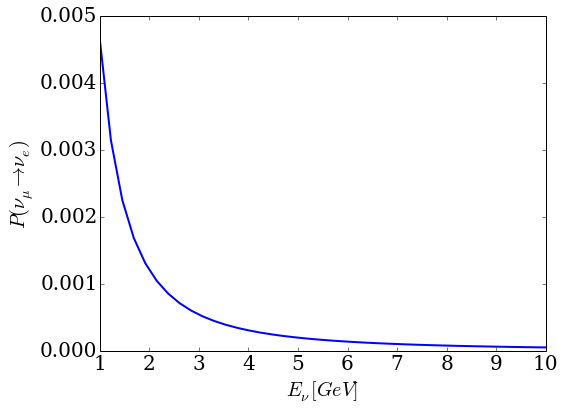

In [13]:
figure(figsize = (8,6))
xlabel(r"$E_\nu [GeV]$")
ylabel(r"$P(\nu_\mu \to \nu_e)$")
plot(energy_values,nu_mu_to_nu_e, lw = 2, color = 'blue')

#### Changing the oscillation parameters

This is a nice plot. But we do not see an *oscillation* like curve. The reason for this is that the oscillation parameters do not produce an oscillation pattern in this $L/E$ scale. **$\nu$-SQuIDs has some predefined oscillation mixing angles ($\theta_{ij}$) and mass splittings ($\Delta m^2_{ij}$)**, which we have taken from the most recents fits. Perhaps you want to change this parameter to investigate what happens, this can be done easily using the `Set` function.

In [14]:
nuSQ.Set_SquareMassDifference(1,2.0e-1) # sets dm^2_{21} in eV^2.

We can then, again, do a plot with this simple script

In [15]:
energy_values = np.linspace(1,10,100)
nu_mu_to_nu_e = []
for Enu in energy_values:
    nuSQ.Set_E(Enu*nuSQ.units.GeV)
    nuSQ.Set_initial_state(np.array([0.,1.,0.]),nsq.Basis.flavor)
    nuSQ.EvolveState()
    nu_mu_to_nu_e.append(nuSQ.EvalFlavor(0))

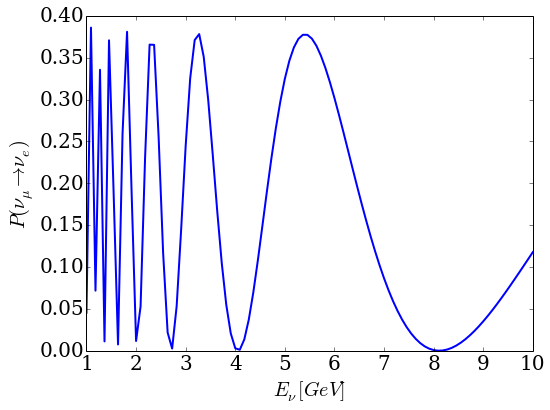

In [16]:
figure(figsize = (8,6))
xlabel(r"$E_\nu [GeV]$")
ylabel(r"$P(\nu_\mu \to \nu_e)$")
plot(energy_values,nu_mu_to_nu_e, lw = 2, color = 'blue')

We can also try to modify the mixing angles (see how to do this in detail in the documentation), for example

In [17]:
nuSQ.Set_MixingAngle(0,1,1.2) # sets \theta_{12} in radians.
nuSQ.Set_MixingAngle(0,2,0.3) # sets \theta_{23}} in radians.
nuSQ.Set_MixingAngle(1,2,0.4) # sets \theta_{23}} in radians.

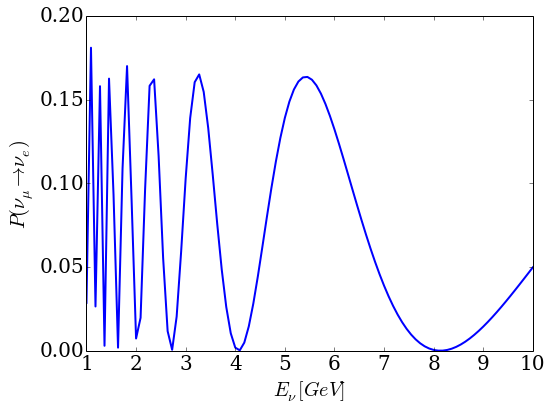

In [18]:
energy_values = np.linspace(1,10,100)
nu_mu_to_nu_e = []
for Enu in energy_values:
    nuSQ.Set_E(Enu*nuSQ.units.GeV)
    nuSQ.Set_initial_state(np.array([0.,1.,0.]),nsq.Basis.flavor)
    nuSQ.EvolveState()
    nu_mu_to_nu_e.append(nuSQ.EvalFlavor(0))

figure(figsize = (8,6))
xlabel(r"$E_\nu [GeV]$")
ylabel(r"$P(\nu_\mu \to \nu_e)$")
plot(energy_values,nu_mu_to_nu_e, lw = 2, color = 'blue')

We can now go back to the defaults, which are the values given by Gonzalez-Garcia et al. (arXiv:1409.5439)

In [26]:
nuSQ.Set_MixingParametersToDefault()

#### Changing where the neutrino propagation takes place

As in the C++ implementation we can change the `Body` by means of the `Set_Body` function and in similar way we can change the `Track`. Lets do an atmospheric oscillation example =).

In [53]:
nuSQ = nsq.nuSQUIDS(3,nsq.NeutrinoType.neutrino)
nuSQ.Set_Body(nsq.EarthAtm())
nuSQ.Set_Track(nsq.EarthAtm.Track(np.arccos(-1)))
nuSQ.Set_rel_error(1.0e-17)
nuSQ.Set_abs_error(1.0e-17)

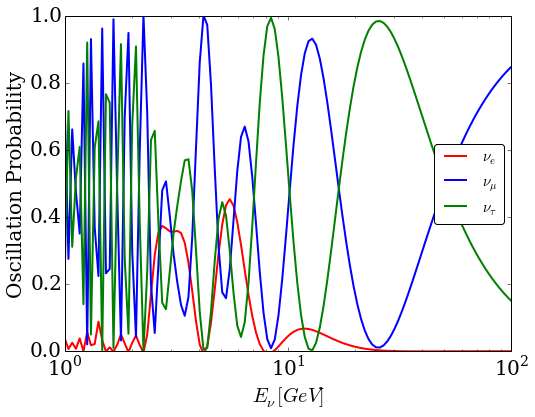

In [54]:
energy_values = np.logspace(0,2,120)
nu_mu_to_nu_e = []
nu_mu_to_nu_mu = []
nu_mu_to_nu_tau = []
for Enu in energy_values:
    nuSQ.Set_E(Enu*nuSQ.units.GeV)
    nuSQ.Set_initial_state(np.array([0.,1.,0.]),nsq.Basis.flavor)
    nuSQ.EvolveState()
    nu_mu_to_nu_e.append(nuSQ.EvalFlavor(0))
    nu_mu_to_nu_mu.append(nuSQ.EvalFlavor(1))
    nu_mu_to_nu_tau.append(nuSQ.EvalFlavor(2))

figure(figsize = (8,6))
xlabel(r"$E_\nu [GeV]$")
ylabel(r"Oscillation Probability")
plot(energy_values,nu_mu_to_nu_e, lw = 2, color = 'red', label = r"$\nu_e$")
plot(energy_values,nu_mu_to_nu_mu, lw = 2, color = 'blue',label = r"$\nu_\mu$")
plot(energy_values,nu_mu_to_nu_tau, lw = 2, color = 'green', label = r"$\nu_\tau$")
legend(fancybox = True, fontsize = 15, loc = 7)
semilogx()
ylim(0.,1.)

#### A 750 km baseline experiment in Earth ####

In [49]:
nuSQ = nsq.nuSQUIDS(3,nsq.NeutrinoType.neutrino)
nuSQ.Set_Body(nsq.Earth())
nuSQ.Set_Track(nsq.Earth.Track(750.0*nuSQ.units.km))

In [50]:
nuSQ.Set_rel_error(1.0e-15)
nuSQ.Set_abs_error(1.0e-17)

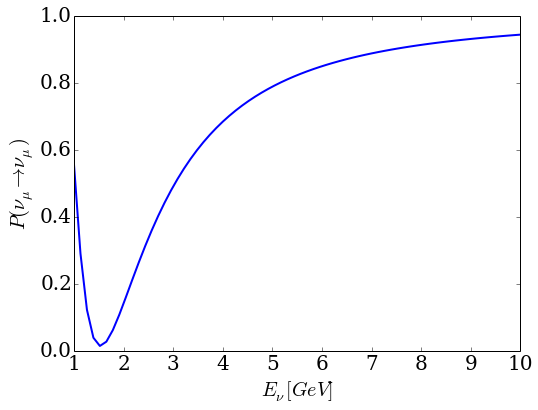

In [52]:
energy_values = np.linspace(1,10,70)
nu_mu_to_nu_e = []
for Enu in energy_values:
    nuSQ.Set_E(Enu*nuSQ.units.GeV)
    nuSQ.Set_initial_state(np.array([0.,1.,0.]),nsq.Basis.flavor)
    nuSQ.EvolveState()
    nu_mu_to_nu_e.append(nuSQ.EvalFlavor(1))

figure(figsize = (8,6))
xlabel(r"$E_\nu [GeV]$")
ylabel(r"$P(\nu_\mu \to \nu_\mu)$")
plot(energy_values,nu_mu_to_nu_e, lw = 2, color = 'blue')

#### Propagating in a constant density slap ####

In [40]:
nuSQ = nsq.nuSQUIDS(3,nsq.NeutrinoType.neutrino)
nuSQ.Set_Body(nsq.ConstantDensity(13.0,0.5))
nuSQ.Set_Track(nsq.ConstantDensity.Track(1000.0*nuSQ.units.km))

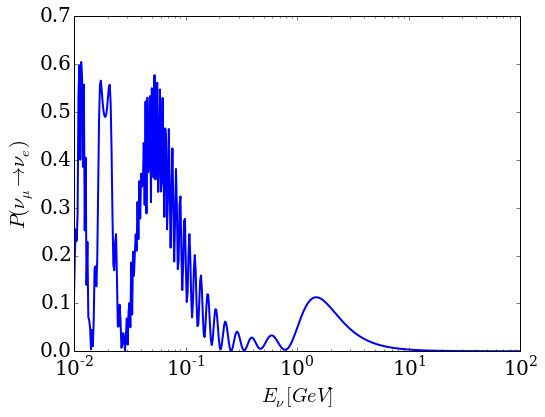

In [42]:
energy_values = np.logspace(-2,2,500)
nu_mu_to_nu_e = []
for Enu in energy_values:
    nuSQ.Set_E(Enu*nuSQ.units.GeV)
    nuSQ.Set_initial_state(np.array([0.,1.,0.]),nsq.Basis.flavor)
    nuSQ.EvolveState()
    nu_mu_to_nu_e.append(nuSQ.EvalFlavor(0))

figure(figsize = (8,6))
xlabel(r"$E_\nu [GeV]$")
ylabel(r"$P(\nu_\mu \to \nu_e)$")
plot(energy_values,nu_mu_to_nu_e, lw = 2, color = 'blue')
semilogx()

#Advanced: multiple energy mode#

So far we have been able to calculate the oscillation probability in a given `Body` and `Track`. We have also been able to change the oscillation parameters (mixing angles and square mass differences), as well as changing the neutrino energy. This is what solving the **Schödinger evolution equation** does and it is a good approximation for most cases, but $\nu$-SQuIDS does **more**: it can solve a **quantum Boltzmann equation**. This means that it can solve a system of the following form

$$\frac{\partial\hat{\rho}_i}{\partial x} = i [H,\hat{\rho}_i] + \{A,\hat{\rho}_i\} + O(\hat{\rho}_i,\hat{\rho}_j)$$

where $\hat{\rho_i}$ represents the neutrino state at $E_\nu = E_i$, $H$ is the Hamiltonian, $A$ is a non unitary operator, and $O$ is an operator that contains the interactions between neutrino states of energies $E_i$ and $E_j$. The **SQuIDS package was designed to solve this kind of equations** (and *more*), in particular **$\nu$-SQuIDS implements this equation for neutrino propagation** in matter including the effects of neutral and charge current interactions, as well as the associated neutral and tau regeneration. For further details refer to [Gonzalez-Garcia et al.](#CHM)

To begin we have to specify the $\{E_i\}$ grid where the equation will be solve. $\nu$-SQuIDS provides two options for this: 
- Linear
- Log

for given $E_{\rm min}$, $E_{\rm max}$, and number of nodes. In this example we will construct a linear grid as between $1 {\rm GeV}$ and $10 {\rm GeV}$.

##Multiple Energy Mode without Interactions##

In [2]:
interactions = False
logscale = False
E_min_GeV = 1.0
E_max_GeV = 10.0
E_nodes = 101
neutrino_flavors = 3

nuSQ = nsq.nuSQUIDS(E_min_GeV,E_max_GeV,E_nodes,neutrino_flavors,nsq.NeutrinoType.neutrino,logscale,interactions)

We can see the nodes energies $\{E_i\}$, which is (in [eV])

In [3]:
nuSQ.GetERange()

array([  1.00000000e+09,   1.09000000e+09,   1.18000000e+09,
         1.27000000e+09,   1.36000000e+09,   1.45000000e+09,
         1.54000000e+09,   1.63000000e+09,   1.72000000e+09,
         1.81000000e+09,   1.90000000e+09,   1.99000000e+09,
         2.08000000e+09,   2.17000000e+09,   2.26000000e+09,
         2.35000000e+09,   2.44000000e+09,   2.53000000e+09,
         2.62000000e+09,   2.71000000e+09,   2.80000000e+09,
         2.89000000e+09,   2.98000000e+09,   3.07000000e+09,
         3.16000000e+09,   3.25000000e+09,   3.34000000e+09,
         3.43000000e+09,   3.52000000e+09,   3.61000000e+09,
         3.70000000e+09,   3.79000000e+09,   3.88000000e+09,
         3.97000000e+09,   4.06000000e+09,   4.15000000e+09,
         4.24000000e+09,   4.33000000e+09,   4.42000000e+09,
         4.51000000e+09,   4.60000000e+09,   4.69000000e+09,
         4.78000000e+09,   4.87000000e+09,   4.96000000e+09,
         5.05000000e+09,   5.14000000e+09,   5.23000000e+09,
         5.32000000e+09,

Lets propage this neutrino through the Earth in an atmospheric neutrino telescope setting. We can do that by setting the following `Body` and `Track`:

In [4]:
nuSQ.Set_Body(nsq.EarthAtm())
nuSQ.Set_Track(nsq.EarthAtm.Track(np.arccos(-1)))

Lets assume that $\phi_\nu = N_0 E^{-2}$, with flavor composition $\phi_e:\phi_\mu:\phi_\tau$ = $0:1:0$. $\nu$-SQuIDS input flux is a `numpy.ndarray` formatted in the following way : 

$$InputState \doteq [[\phi^1_e,\phi^1_\mu,\phi^1_\tau],...,[\phi^i_e,\phi^i_\mu,\phi^i_\tau],...,[\phi^n_e,\phi^n_\mu,\phi^n_\tau]]$$ where i = 1 to n and n is the number of energy nodes. We can implement this in the following way

In [5]:
N0 = 1.0e18
Eflux = lambda E: N0*E**-2
Einitial = (Eflux(nuSQ.GetERange()).reshape((101,1)))*(np.array([0.,1.,0.]).reshape(1,3))

We can plot the initial flux:

[]

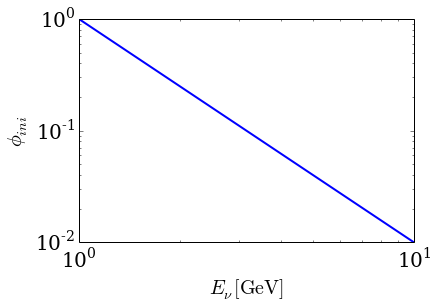

In [6]:
xlabel(r"$E_\nu [{\rm GeV}]$")
ylabel(r"$\phi_{ini}$")
plot(np.array(nuSQ.GetERange())/nuSQ.units.GeV,np.array(Einitial)[:,1], lw = 2)
loglog()

Lets set this initial state

In [7]:
nuSQ.Set_initial_state(Einitial,nsq.Basis.flavor)

Lets **propage** this flux through the **Earth**

In [8]:
nuSQ.Set_rel_error(1.0e-17)
nuSQ.Set_abs_error(1.0e-17)
nuSQ.Set_h_max(500.0*nuSQ.units.km)
nuSQ.Set_MixingParametersToDefault()

In [9]:
nuSQ.EvolveState()

That' it. Now `nuSQ` contains the evolved object. Lets get the information from it.

We can now calculate all of the flavor contributions at this current time. Notice that we can even increase the energy resolution in this multiple energy mode. The reason for this is that $\nu$-SQuIDS stores the neutrino states (${\rho_i}$) in the interaction basis, thus it can interpolate between states and then proyect into flavor. In symbols, for a given neutrino energy $E_\nu$ and flavor $\alpha$,

$$\texttt{EvalFlavor}(E_\nu,\alpha) = {\rm Tr}\left[\Pi_\alpha (E_\nu) * \rho(E_\nu)\right]$$

where $\Pi_\alpha (E_\nu) = e^{-i\hat{H_0}}\Pi_\alpha e^{i\hat{H_0}}$, with $H_0$ the base hamiltonian evaluated at $E_\nu$, and $\rho(E_\nu)$ is a linear interpolation of the $\rho_i$ states in the energy (node) axis.

In [11]:
e_range = np.linspace(1.0,10.0,200)

nu_e = np.array([nuSQ.EvalFlavor(0,EE*nuSQ.units.GeV,0) 
                           for EE in e_range])
nu_mu = np.array([nuSQ.EvalFlavor(1,EE*nuSQ.units.GeV,0) 
                           for EE in e_range])
nu_tau = np.array([nuSQ.EvalFlavor(2,EE*nuSQ.units.GeV,0) 
                           for EE in e_range])

total = nu_e + nu_mu + nu_tau

[]

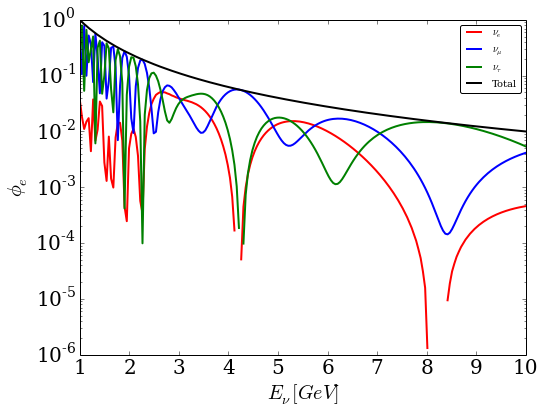

In [12]:
figure(figsize = (8,6))

xlabel(r"$E_\nu [GeV]$")
ylabel(r"$\phi_e$")

plot(e_range,nu_e, lw = 2, color = 'red', label = r"$\nu_e$")
plot(e_range,nu_mu, lw = 2, color = 'blue', label = r"$\nu_\mu$")
plot(e_range,nu_tau, lw = 2, color = 'green', label = r"$\nu_\tau$")
plot(e_range,total, lw = 2, color = 'black', label = r"Total")
legend(fancybox = True, fontsize = 10)
semilogy()

We can now try to reproduce the plot that we did in the single energy case: $P(\nu_\mu \to \nu_e)$. If you compare with the single energy plot you will notice that they are in agrement and, furthermore, the multiple energy mode **was able to reproduce the *fast* oscillation behaviour** at low energies eventhough it has **less energy nodes**

(0.0, 1.0)

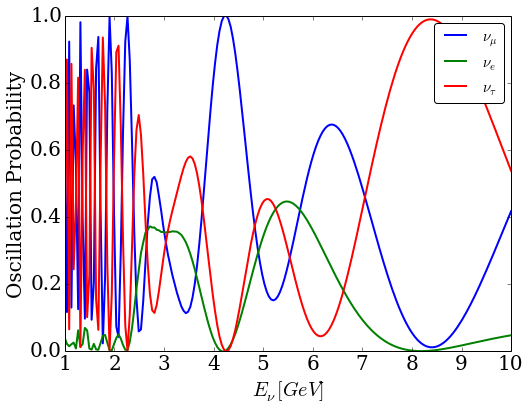

In [15]:
figure(figsize = (8,6))
xlabel(r"$E_\nu [GeV]$")
ylabel(r"Oscillation Probability")
nu_mu_to_nu_mu = nu_mu/Eflux(e_range*nuSQ.units.GeV)
nu_mu_to_nu_tau = nu_tau/Eflux(e_range*nuSQ.units.GeV)
nu_mu_to_nu_e = nu_e/Eflux(e_range*nuSQ.units.GeV)
plot(e_range,nu_mu_to_nu_mu, lw = 2, color = 'blue',label = r"$\nu_\mu$")
plot(e_range,nu_mu_to_nu_e, lw = 2, color = 'green',label = r"$\nu_e$")
plot(e_range,nu_mu_to_nu_tau, lw = 2, color = 'red',label = r"$\nu_\tau$")
legend(fancybox = True, fontsize = 15, loc = 'upper right')
plt.ylim(0.,1.)

##Multiple Energy Mode with Interactions##

The multiple energy mode solves the quantum differential equactions in an energy grid (${E_i}$), this enables to include interactions between nodes at positions $i$ and $j$. We will now exemplify this.

In [2]:
interactions = True
logscale = True
E_min_GeV = 1.0e2
E_max_GeV = 1.0e8
E_nodes = 200
neutrino_flavors = 3

nuSQ = nsq.nuSQUIDS(E_min_GeV,E_max_GeV,E_nodes,neutrino_flavors,nsq.NeutrinoType.neutrino,logscale,interactions)

In [3]:
N0 = 1.0e18; Power = -1.0
Eflux = lambda E: N0*E**Power
InitialFlux = (Eflux(nuSQ.GetERange()).reshape(E_nodes,1))*(np.array([0.,1.,0.]).reshape(1,3))

In [4]:
nuSQ.Set_rel_error(1.0e-10)
nuSQ.Set_abs_error(1.0e-10)
nuSQ.Set_h_max(500.0*nuSQ.units.km)
nuSQ.Set_MixingParametersToDefault()

In [5]:
nuSQ.Set_Body(nsq.EarthAtm())
nuSQ.Set_Track(nsq.EarthAtm.Track(np.arccos(-1.0)))
nuSQ.Set_initial_state(InitialFlux,nsq.Basis.flavor)

In [6]:
%time nuSQ.EvolveState()

CPU times: user 26.4 s, sys: 83.8 ms, total: 26.5 s
Wall time: 26.5 s


In [8]:
nu_e = np.array([nuSQ.EvalFlavorAtNode(0,ie,0) 
                           for ie in range(E_nodes)])
nu_mu = np.array([nuSQ.EvalFlavorAtNode(1,ie,0) 
                           for ie in range(E_nodes)])
nu_tau = np.array([nuSQ.EvalFlavorAtNode(2,ie,0) 
                           for ie in range(E_nodes)])

E_range = np.array(nuSQ.GetERange())/nuSQ.units.GeV

total = nu_e + nu_mu + nu_tau

[]

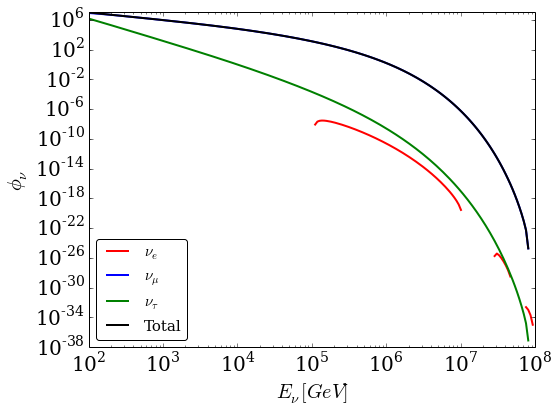

In [9]:
figure(figsize = (8,6))

xlabel(r"$E_\nu [GeV]$")
ylabel(r"$\phi_\nu$")

plot(E_range,nu_e, lw = 2, color = 'red', label = r"$\nu_e$")
plot(E_range,nu_mu, lw = 2, color = 'blue', label = r"$\nu_\mu$")
plot(E_range,nu_tau, lw = 2, color = 'green', label = r"$\nu_\tau$")
plot(E_range,total, lw = 2, color = 'black', label = r"Total")
legend(fancybox = True, loc = 'lower left', fontsize = 15)
loglog()

We can compare this calculation with Figure 4 of [Gonzalez-Garcia et al.](#CHM) and find them in excellent agreement. Just note that the small kink at $10^2$ is the result of neutrino oscillations and the difference at high energy attenuation amplitud is due to different cross section.

[]

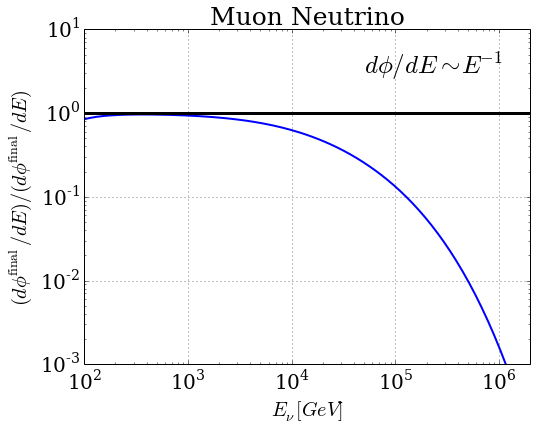

In [11]:
figure(figsize = (8,6))
xlabel(r"$E_\nu [GeV]$")
ylabel(r"$(d\phi^{\rm final}/dE)/(d\phi^{\rm final}/dE)$")
nu_mu_to_nu_mu = nu_mu/Eflux(E_range*nuSQ.units.GeV)
plot(E_range,nu_mu_to_nu_mu, lw = 2, color = 'blue')
title(r"Muon Neutrino", fontsize = 25)
text(5.0e4,3.0,r"$d\phi/dE \sim E^{-1}$", fontsize = 25)
axhline (1.0, color = "k", lw = 3)
ylim(1.0e-3,1.0e1)
xlim(1.0e2,2.0e6)
grid()
loglog()

###Handeling neutrinos and antineutrinos with tau regeneration###

To include $\tau$ regeneration we have to work on the multi energy mode and set the neutrino type to "both". We can initialize the $\nu$-SQuIDS object in the following way

In [2]:
interactions = True
logscale = True
E_min_GeV = 1.0e2
E_max_GeV = 1.0e8
E_nodes = 200
neutrino_flavors = 3

nuSQ = nsq.nuSQUIDS(E_min_GeV,E_max_GeV,E_nodes,neutrino_flavors,nsq.NeutrinoType.both,logscale,interactions)

In this case we need to specify the neutrino and antineutrino initial fluxes. Those have the following format:

$$InputState \doteq [[[\phi^1_e,\phi^1_\mu,\phi^1_\tau],[\bar{\phi}^1_e,\bar{\phi}^1_\mu,\bar{\phi}^1_\tau]],...,[[\phi^i_e,\phi^i_\mu,\phi^i_\tau],[\bar{\phi}^i_e,\bar{\phi}^i_\mu,\bar{\phi}^i_\tau]],...,[[\phi^n_e,\phi^n_\mu,\phi^n_\tau],[\bar{\phi}^n_e,\bar{\phi}^n_\mu,\bar{\phi}^n_\tau]]]$$ where i = 1 to n and n is the number of energy nodes and $\phi$ ($\bar{\phi}$) is the neutrino (antineutrino) flux.

In [3]:
N0 = 1.0e18; Power = -1.0
Eflux = lambda E: N0*E**Power

InitialFlux = zeros((200,2,3))
for i,E in enumerate(nuSQ.GetERange()):
    InitialFlux[i][0][0] = 0.0
    InitialFlux[i][1][0] = 0.0
    InitialFlux[i][0][1] = Eflux(E)
    InitialFlux[i][1][1] = Eflux(E)
    InitialFlux[i][0][2] = Eflux(E)
    InitialFlux[i][1][2] = Eflux(E)

In [4]:
nuSQ.Set_rel_error(1.0e-7)
nuSQ.Set_abs_error(1.0e-7)
nuSQ.Set_h_max(500.0*nuSQ.units.km)
nuSQ.Set_MixingParametersToDefault()

In [5]:
nuSQ.Set_Body(nsq.EarthAtm())
nuSQ.Set_Track(nsq.EarthAtm.Track(np.arccos(-1.0)))
nuSQ.Set_initial_state(InitialFlux,nsq.Basis.flavor)
nuSQ.Set_TauRegeneration(True)

In [6]:
%time nuSQ.EvolveState()

CPU times: user 5min 21s, sys: 1.03 s, total: 5min 22s
Wall time: 5min 23s


In [7]:
nu_tau = np.array([ nuSQ.EvalFlavorAtNode(2,ie,0) for ie,EE in enumerate(nuSQ.GetERange())])
nu_tau_bar = np.array([ nuSQ.EvalFlavorAtNode(2,ie,1) for ie,EE in enumerate(nuSQ.GetERange())])

nu_mu = np.array([ nuSQ.EvalFlavorAtNode(1,ie,0) for ie,EE in enumerate(nuSQ.GetERange())])
nu_mu_bar = np.array([ nuSQ.EvalFlavorAtNode(1,ie,1) for ie,EE in enumerate(nuSQ.GetERange())])

E_range = nuSQ.GetERange()/nuSQ.units.GeV

[]

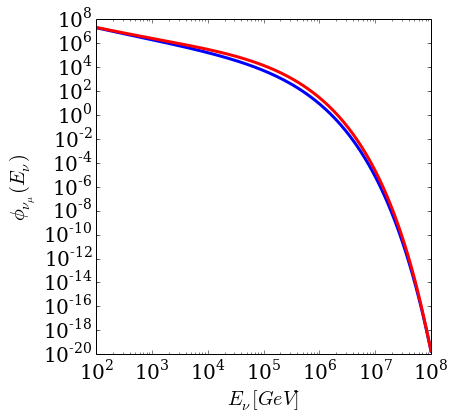

In [9]:
figure(figsize = (6,6))
xlabel(r"$E_\nu [GeV]$")
ylabel(r"$\phi_{\nu_\mu} (E_\nu)$")

plot(E_range,nu_mu+nu_mu_bar, lw = 3, color = 'blue')
plot(E_range,nu_tau+nu_tau_bar, lw = 3, color = 'red')
loglog()

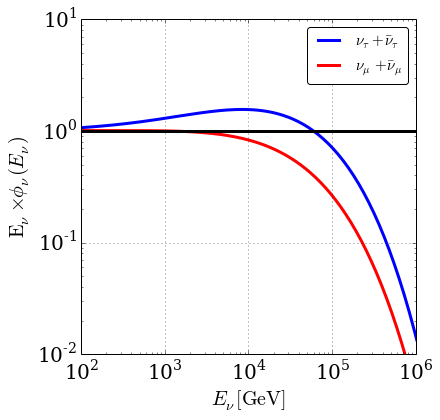

In [13]:
figure(figsize = (6,6))
xlabel(r"$E_\nu [{\rm GeV}]$")
ylabel(r"${\rm E_\nu} \times \phi_\nu (E_\nu)$")
e_range = nuSQ.GetERange()/nuSQ.units.GeV
plot(e_range,0.5*(nu_tau+nu_tau_bar)*(e_range*nuSQ.units.GeV)/N0, lw = 3, label =r"$\nu_\tau + \bar{\nu}_\tau$", color = "blue")
plot(e_range,0.5*(nu_mu+nu_mu_bar)*(e_range*nuSQ.units.GeV)/N0, lw = 3, label =r"$\nu_\mu + \bar{\nu}_\mu$", color = "red")
axhline (1.0, color = "k", lw = 3)
xlim(1.0e2,1.0e6)
ylim(1.0e-2,1.0e1)
grid()
loglog()
legend(loc = "upper right", fancybox = True, fontsize = 15)

##Neutrino Oscillation in a (3+1) model##

In [120]:
interactions = False
logscale = False
E_min_GeV = 1.0
E_max_GeV = 100.0
E_nodes = 201
neutrino_flavors = 4

nuSQ = nsq.nuSQUIDS(E_min_GeV,E_max_GeV,E_nodes,neutrino_flavors,nsq.NeutrinoType.antineutrino,logscale,interactions)

In [121]:
nuSQ.Set_Body(nsq.EarthAtm())
nuSQ.Set_Track(nsq.EarthAtm.Track(np.arccos(-1)))

In [122]:
N0 = 1.0e18
Eflux = lambda E: N0*E**-2
Einitial = (Eflux(np.array(nuSQ.GetERange())).reshape(E_nodes,1))*(np.array([0.,1.,0.,0.]).reshape(1,4))

In [123]:
nuSQ.Set_initial_state(Einitial,nsq.Basis.flavor)

In [124]:
nuSQ.Set_rel_error(1.0e-7)
nuSQ.Set_abs_error(1.0e-7)

nuSQ.Set_MixingParametersToDefault()
nuSQ.Set_SquareMassDifference(3,1.) 
nuSQ.Set_MixingAngle(1,3,0.6) 

In [125]:
nuSQ.EvolveState()

In [126]:
e_range = np.logspace(0,2,400)

nu_e = np.array([nuSQ.EvalFlavor(0,EE*nuSQ.units.GeV,0) 
                           for EE in e_range])
nu_mu = np.array([nuSQ.EvalFlavor(1,EE*nuSQ.units.GeV,0) 
                           for EE in e_range])
nu_tau = np.array([nuSQ.EvalFlavor(2,EE*nuSQ.units.GeV,0) 
                           for EE in e_range])

total = nu_e + nu_mu + nu_tau

[]

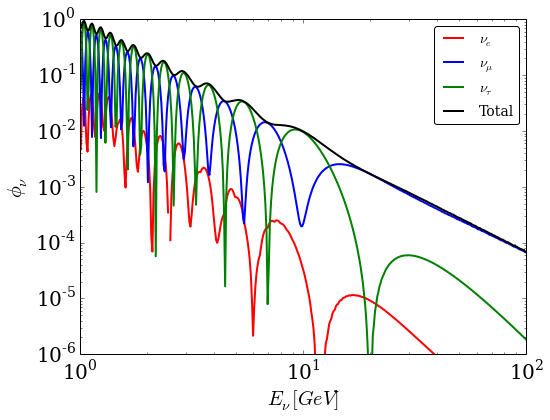

In [127]:
figure(figsize = (8,6))

xlabel(r"$E_\nu [GeV]$")
ylabel(r"$\phi_\nu$")

plot(e_range,nu_e, lw = 2, color = 'red', label = r"$\nu_e$")
plot(e_range,nu_mu, lw = 2, color = 'blue', label = r"$\nu_\mu$")
plot(e_range,nu_tau, lw = 2, color = 'green', label = r"$\nu_\tau$")
plot(e_range,total, lw = 2, color = 'black', label = r"Total")
legend(fancybox = True, fontsize = 14)

ylim(1.0e-6,1.0)

loglog()

# nuSQUIDS: Atmospheric Mode

In [2]:
nsq_atm = nsq.nuSQUIDSAtm("./atmospheric_example_numneu_3.hdf5")
#nsq_atm = nsq.nuSQUIDSAtm("./kaon_atmospheric.hdf5")

In [3]:
erange = nsq_atm.GetERange()
neutype = 1
phi_e = [nsq_atm.EvalFlavor(0,-0.5,EE,neutype) for EE in erange]
phi_mu = [nsq_atm.EvalFlavor(1,-0.5,EE,neutype) for EE in erange]
phi_tau = [nsq_atm.EvalFlavor(2,-0.5,EE,neutype) for EE in erange]

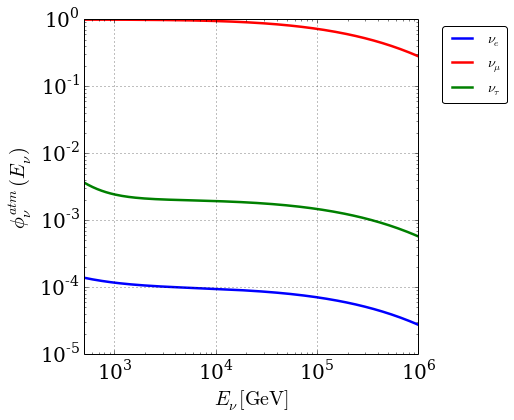

In [4]:
figure(figsize = (6,6))

plot(erange,phi_e, lw = 2.5, color = "blue", label = r"$\nu_e$")
plot(erange,phi_mu, lw = 2.5, color = "red", label = r"$\nu_\mu$")
plot(erange,phi_tau, lw = 2.5, color = "green", label = r"$\nu_\tau$")

loglog()

xlim(erange[0],erange[-1])
xlabel(r"$E_\nu [{\rm GeV}]$")
ylabel(r"$\phi^{atm}_\nu (E_\nu)$")

grid()

legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 14, fancybox = True)

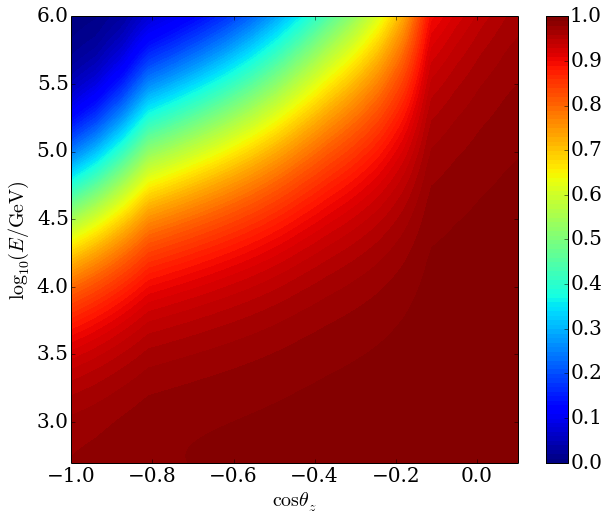

In [5]:
get_flux_nu_mu = lambda costh,log_enu : nsq_atm.EvalFlavor(1,costh,10**log_enu,1)
vgfnumu = np.vectorize(get_flux_nu_mu)

enu_min = log10(erange[0])
enu_max = log10(erange[-1])
costh_min = -1.
costh_max = 0.2
step_enu = (enu_max - enu_min)/400.0
step_costh = (costh_max - costh_min)/100.0
    
nenu = np.arange(enu_min,enu_max,step_enu)
ncosth = np.arange(costh_min,costh_max,step_costh)

NCOSTH, NENU = np.meshgrid(ncosth, nenu)
PHINUMU = vgfnumu(NCOSTH,NENU)

plt.figure(figsize = (10,8))
plt.ylim(np.log10(500.0),6)
plt.xlim(-1,0.1)

plt.contourf(NCOSTH,NENU,PHINUMU,100)

plt.xlabel(r"$\cos \theta_z$")
plt.ylabel(r"$\mathrm{log}_{10}(E/\mathrm{GeV})$")

v = np.linspace(0.0, 1.0, 11, endpoint=True)
plt.colorbar(ticks = v)
plt.clim(0,1)

In [23]:
nuSQ = nsq.nuSQUIDS(3,"neutrino")
nuSQ.Set_Body(nsq.EarthAtm())
nuSQ.Set_Track(nsq.EarthAtm.Track(np.arccos(0.7)))

In [12]:
for x in np.arange(nuSQ.GetTrack().GetInitialX(),nuSQ.GetTrack().GetFinalX(),5*nuSQ.units.km):
    t = nuSQ.GetTrack()
    t.SetX(x)
    nuSQ.Set_Track(t)
    print x/nuSQ.units.km,nuSQ.GetBody().density(nuSQ.GetTrack())

0.0 0.987060362358
5.0 0.987092592474
10.0 0.987122466492
15.0 0.987149984145
20.0 0.987175145187
25.0 0.987197949392
30.0 0.987218396555
35.0 0.987236486494
40.0 0.987252219048
45.0 0.987265594074
50.0 0.987276611453
55.0 0.987285271086
60.0 0.987291572897
65.0 0.987295516828
70.0 0.987297102844
75.0 0.987296330931
80.0 0.987293201095
85.0 0.987287713366
90.0 0.987279867792
95.0 0.987269664443
100.0 0.98725710341
105.0 0.987242184807
110.0 0.987224908766
115.0 0.987205275443
120.0 0.987183285014
125.0 0.987158937674
130.0 0.987132233643
135.0 0.987103173159
140.0 0.987071756482


#References#

- <a id="CHM">[1]</a> *M.C. Gonzalez-Garcia, F. Halzen, and M. Maltoni*, **Physics Reach of High-Energy and High-Statistics IceCube Atmospheric Neutrino Data**, Phys.Rev. D71 (2005) 093010. http://arxiv.org/abs/hep-ph/0502223
- *C.A. Argüelles-Delgado, J. Salvado, and C. N. Weaver*, **SQuIDS: A Simple Quantum Integro Differential equation Solve.** On preparation.
- *C.A. Argüelles-Delgado, J. Salvado, and C. N. Weaver*, **$\nu$-SQuIDS: A tool box for neutrino oscillation experiments.** On preparation.
- M. Galassi et al, GNU Scientific Library Reference Manual (3rd Ed.), ISBN 0954612078. http://www.gnu.org/software/gsl/